In [1]:
from utils.ifa_meander_project.ifa_meander_utils import *
from utils.ifa_meander_project.ifa_creation_functions import *
from utils.ifa_meander_project.ifa_meander_gmsh import *
from utils.ifa_meander_project.meander_plot import *
from utils.ifa_meander_project.meander_simulation_functions_version4 import *
import time

In [2]:
mesh_name = "ifa_meander_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

fC      = 868e6
fLow    = 820e6
fHigh   = 940e6

nPoints = calculate_nPoints(fLow, fHigh, fC)
accuracy= 0.01
print(f"nPoints = {nPoints}")

In [3]:
fC      = 868e6  # fréquence centrale en Hz
delta_f = 4e6  # écart entre les échantillons en Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 21     # nombre d'échantillons

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")
print("Liste des frequences :")
for i, frequency in enumerate(frequencies, 1):
    print(f"Simulation Numéro {i} = {frequency / 1e6:.2f} MHz")

fc_index = np.where(frequencies == fC)[0][0]
print(f"Index de la fréquence centrale {fC/1e6:.2f} MHz : {fc_index}")

delta_f = 4.00 MHz
fLow = 828.00 MHz, fHigh = 908.00 MHz, nPoints = 21
Liste des frequences :
Simulation Numéro 1 = 828.00 MHz
Simulation Numéro 2 = 832.00 MHz
Simulation Numéro 3 = 836.00 MHz
Simulation Numéro 4 = 840.00 MHz
Simulation Numéro 5 = 844.00 MHz
Simulation Numéro 6 = 848.00 MHz
Simulation Numéro 7 = 852.00 MHz
Simulation Numéro 8 = 856.00 MHz
Simulation Numéro 9 = 860.00 MHz
Simulation Numéro 10 = 864.00 MHz
Simulation Numéro 11 = 868.00 MHz
Simulation Numéro 12 = 872.00 MHz
Simulation Numéro 13 = 876.00 MHz
Simulation Numéro 14 = 880.00 MHz
Simulation Numéro 15 = 884.00 MHz
Simulation Numéro 16 = 888.00 MHz
Simulation Numéro 17 = 892.00 MHz
Simulation Numéro 18 = 896.00 MHz
Simulation Numéro 19 = 900.00 MHz
Simulation Numéro 20 = 904.00 MHz
Simulation Numéro 21 = 908.00 MHz
Index de la fréquence centrale 868.00 MHz : 10


In [4]:
vitesse_lumiere = 3.0e8  # en mètres par seconde (m/s)
longueur_onde = vitesse_lumiere / fC 
quart_d_onde = longueur_onde / 4

print(f"Pour la fréquence de raisonnance {fC} Hz :")
print(f"Longueur d'onde (λ) = {longueur_onde} m")
print(f"Quart d'onde (λ/4) = {quart_d_onde} m")

Pour la fréquence de raisonnance 868000000.0 Hz :
Longueur d'onde (λ) = 0.3456221198156682 m
Quart d'onde (λ/4) = 0.08640552995391705 m


In [5]:
# Terminal size 
t_a = 60 / 1000   # Hauteur
a = 20 / 1000 
t_b = 40 / 1000  # Largeur
b = t_b
x_t = np.array([-t_a, 0, 0, -t_a])
y_t = np.array([t_b, t_b, 0, 0])

In [6]:
wid = 1 / 1000    
feed_wid = wid

# L_short = 1.25 / 1000
L_short = 3.45 / 1000
Lenght_antenna = quart_d_onde

# feed = t_b/2
# feed = 0.75 * t_b
feed = 26.25 / 1000        # yeah ça marche bien apres 2 iteration avec 26.25 mm
# feed = 21.15 / 1000      # Yeah ça marche bien apres 1 iteration avec 21.15 mm
feed_point = [0, feed, 0]

x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
# conditionnement pour la distance entre les meandres
""" if distance_meandre < 0.5 / 1000 + wid:
    print(f"Attention, la distance entre les meandres ({distance_meandre}) est trop petite par rapport à la largeur ({wid}).")
    print("Ajustement de la longueur de l'antenne pour respecter la condition.")
    L_short = 1.5 * wid
    x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short) """

x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

In [7]:
Find_good_number_of_meanders = False
Find_good_width_of_meanders = False

x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

print(f"Wid meandree = {wid}")
print(f"L_short = {L_short}")
print(f"feed_Position = {feed}")
print(f"Nombre de meandres = {Nombre_meandre}")
print(f"Distance entre les meandres = {distance_meandre}")

extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)

# Mesure le temps de calcul
start_time = time.time()

# Simulation de la courbe S11 et des impédances
s11_db, impedances, R_res, X_res, f_resonance, min_index = simulate_frequency_sweep(frequencies, fC, ifa_meander_mat, feed_point)
end_time = time.time()
elapsed_time_sec = end_time - start_time
elapsed_time_min = elapsed_time_sec / 60
print(f"Temps de calcul pour la simulation : {elapsed_time_sec:.2f} secondes ({elapsed_time_min:.2f} minutes)")

# Affichage des résultats
plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

ratio_res_over_coupure = f_resonance / fC
#affiche le ratio_res_over_coupure
print(f"Ratio de la fréquence de résonance sur la fréquence de coupure : {ratio_res_over_coupure:.2f}")

# si la frequence de resonance est entre fLow et fHigh
if fLow < f_resonance and f_resonance < fHigh:
    print(f"La fréquence de résonance {f_resonance/1e6:.2f} MHz est entre fLow et fHigh.")
    Find_good_number_of_meanders = True
    if s11_db[min_index] < -10.0:
        print(f"La courbe S11 est inférieure à -10 dB à la fréquence de résonance {f_resonance/1e6:.2f} MHz.")
        Find_good_positon_of_feed = True

    if s11_db[min_index] < -20.0:
        print(f"La courbe S11 est inférieure à -20 dB à la fréquence de résonance {f_resonance/1e6:.2f} MHz.")


if f_resonance == fLow or f_resonance == fHigh and not Find_good_number_of_meanders:
    # multiplier le nombre de meanders par le ratio
    Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
    print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")

elif f_resonance > fLow or f_resonance < fHigh and not Find_good_width_of_meanders:
    Find_good_number_of_meanders = True
    # Nous somme dass le cas où la fréquence de résonance est entre fLow et fHigh
    print(f"La fréquence de résonance {f_resonance/1e6:.2f} MHz est entre fLow et fHigh.")
    # print on ajuste le width of meanders legerement
    wid = wid * ratio_res_over_coupure**2
    

x, y = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
    

# Premier code d'optimisation

max_iterations = 15
Z0 = 50  # Impédance caractéristique de la ligne
iteration = 0
has_converged = False

Nombre_meandre = 6

# x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)

while not has_converged and iteration < max_iterations:
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

    print(f"\nItération {iteration + 1}")
    print(f"Wid meandree = {wid*1000} mm")
    print(f"L_short = {L_short*1000} mm")
    print(f"feed_Position = {feed*1000} mm")
    print(f"Nombre de meandres = {Nombre_meandre}")
    print(f"Distance entre les meandres = {distance_meandre*1000} mm")
    # Afficher etat de Find_good_number_of_meanders et Find_good_width_of_meanders
    print(f"Find_good_number_of_meanders = {Find_good_number_of_meanders}")
    print(f"Find_good_width_of_meanders = {Find_good_width_of_meanders}")

    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)

    start_time = time.time()
    s11_db, impedances, R_res, X_res, f_resonance, min_index = simulate_frequency_sweep(frequencies, fC, ifa_meander_mat, feed_point)
    end_time = time.time()
    elapsed_time_sec = end_time - start_time
    elapsed_time_min = elapsed_time_sec / 60
    print(f"Temps de calcul pour la simulation : {elapsed_time_sec:.2f} secondes ({elapsed_time_min:.2f} minutes)")

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    ratio_res_over_coupure = f_resonance / fC
    print(f"Ratio de la fréquence de résonance sur la fréquence de coupure : {ratio_res_over_coupure:.5f}")

    if abs(1 - ratio_res_over_coupure) > 0.006:
            print("La fréquence de résonance est éloignée de la fréquence centrale.")
            Find_good_width_of_meanders = False
            Find_good_number_of_meanders = False

    # Si la frequence de resonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres n'est pas encore trouvée
    if fLow < f_resonance and f_resonance < fHigh and not Find_good_width_of_meanders:
        print("cas 0")
        print(f"La fréquence de résonance {f_resonance/1e6:.2f} MHz est entre fLow et fHigh.")
        Find_good_number_of_meanders = True
        if abs(1 - ratio_res_over_coupure) < 0.005:
            print("La fréquence de résonance est égale ou proche à la fréquence centrale.")
            Find_good_width_of_meanders = True
        else:
            # wid = wid / ratio_res_over_coupure**2
            if f_resonance < fC:
                wid = wid / ratio_res_over_coupure**2
            else:
                wid = wid * ratio_res_over_coupure**2
                

    # Si la fréquence de résonance est égale à fLow ou fHigh, on ajuste le nombre de meandres
    if (f_resonance == fLow or f_resonance == fHigh) and not Find_good_number_of_meanders:
        print("cas 1")
        print(f"La fréquence de résonance {f_resonance/1e6:.2f} MHz est égale à fLow ou fHigh.")
        Find_good_number_of_meanders = False
        Find_good_width_of_meanders = False
        if f_resonance == fLow:
            print("La fréquence de résonance est égale à fLow.")
            Nombre_meandre = int(Nombre_meandre * ratio_res_over_coupure)
        else:
            Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
        print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")

    # Si la fréquence de résonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres et le nombre de meandre sont trouvée et que la position du feed n'est pas encore trouvée
    if Find_good_number_of_meanders and Find_good_width_of_meanders:
        print("cas 2")        
        print("Recherche de la position du feed...")
        if s11_db[min_index] < -10.0 and abs(1 - ratio_res_over_coupure) < 0.005:
            print(f"La courbe S11 est inférieure à -10 dB à la fréquence de résonance {f_resonance/1e6:.2f} MHz.")
            print("La fréquence de résonance est égale ou proche à la fréquence centrale.")
            has_converged = True
        else:
            print("cas 2.2")
            # wid = wid * ratio_res_over_coupure**2
            print(f"(50 / R_res) : {50 / R_res} mm")
            if f_resonance < fC:
                wid = wid / ratio_res_over_coupure**2
                feed = feed / (Z0 / R_res)**2
            else:
                wid = wid * ratio_res_over_coupure**2
                feed = feed * (Z0 / R_res)**2
            # feed = feed * (Z0 / R_res)**2
            # feed = feed + 3 / 1000
            if feed >= b - 3 * wid:
                feed = b - 3 * wid
            if feed <= wid / 2:
                feed = wid / 2
            feed_point = [0, feed, 0]
        
            
    x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    
    iteration += 1


In [8]:
max_iterations = 15
Z0 = 50  # Impédance caractéristique de la ligne
iteration = 0
has_converged = False

# Nombre_meandre = 5

x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
# x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)

while not has_converged and iteration < max_iterations:
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

    print(f"\nItération {iteration + 1}")
    print(f"Wid meandree = {wid*1000} mm")
    print(f"L_short = {L_short*1000} mm")
    print(f"feed_Position = {feed*1000} mm")
    print(f"Nombre de meandres = {Nombre_meandre}")
    print(f"Distance entre les meandres = {distance_meandre*1000} mm")

    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)

    start_time = time.time()
    s11_db, impedances, R_res, X_res, f_resonance, min_index = simulate_frequency_sweep(frequencies, fC, ifa_meander_mat, feed_point)
    end_time = time.time()
    elapsed_time_sec = end_time - start_time
    elapsed_time_min = elapsed_time_sec / 60
    print(f"Temps de calcul pour la simulation : {elapsed_time_sec:.2f} secondes ({elapsed_time_min:.2f} minutes)")

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    ratio_res_over_coupure = f_resonance / fC
    error = abs((fC - f_resonance) / fC)
    print(f"Ratio f_resonance / fC : {ratio_res_over_coupure:.5f}")
    print(f"Erreur relative : {error:.5f}")

    # Algorithme de correction des paramètres

    if error < 0.01 and s11_db[fc_index] < -10.0:
        print("On est sous le seuil de l'erreur relative de 0.01, on a trouvé la fréquence de résonance.")
        has_converged = True
    else:
        if f_resonance == fLow:
            print("La fréquence de résonance est égale à fLow.")
            Nombre_meandre = int(Nombre_meandre * ratio_res_over_coupure)
            print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")
        elif f_resonance == fHigh:
            print("La fréquence de résonance est égale à fHigh.")
            Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
            print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")
        if f_resonance < fC:
            print("La fréquence de résonance est superieur fLow.")
            wid = wid / ratio_res_over_coupure
            feed = feed - 2 / 1000
        if fC < f_resonance:
            print("La fréquence de résonance est inférieure à fHigh.")
            wid = wid * ratio_res_over_coupure
            feed = feed - 2 / 1000

    if feed >= b - 3 * wid:
        feed = b - 3 * wid
    if feed <= wid / 2:
        feed = wid / 2
    feed_point = [0, feed, 0]

    """ # Si la frequence de resonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres n'est pas encore trouvée
    if fLow < f_resonance and f_resonance < fHigh and not Find_good_width_of_meanders:
        print("Cas 1")
                
    # Si la fréquence de résonance est égale à fLow ou fHigh, on ajuste le nombre de meandres
    if (f_resonance == fLow or f_resonance == fHigh) and not Find_good_number_of_meanders:
        print("cas 1")
        print(f"La fréquence de résonance {f_resonance/1e6:.2f} MHz est égale à fLow ou fHigh.")
        Find_good_number_of_meanders = False
        Find_good_width_of_meanders = False
        if f_resonance == fLow:
            print("La fréquence de résonance est égale à fLow.")
            Nombre_meandre = int(Nombre_meandre * ratio_res_over_coupure)
        else:
            Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
        print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")

    # Si la fréquence de résonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres et le nombre de meandre sont trouvée et que la position du feed n'est pas encore trouvée
    if Find_good_number_of_meanders and Find_good_width_of_meanders:
        print("cas 2")        
        print("Recherche de la position du feed...")
        if s11_db[min_index] < -10.0 and abs(1 - ratio_res_over_coupure) < 0.005:
            print(f"La courbe S11 est inférieure à -10 dB à la fréquence de résonance {f_resonance/1e6:.2f} MHz.")
            print("La fréquence de résonance est égale ou proche à la fréquence centrale.")
            has_converged = True
        else:
            print("cas 2.2")
            # wid = wid * ratio_res_over_coupure**2
            print(f"(50 / R_res) : {50 / R_res} mm")
            if f_resonance < fC:
                wid = wid / ratio_res_over_coupure**2
                feed = feed / (Z0 / R_res)**2
            else:
                wid = wid * ratio_res_over_coupure**2
                feed = feed * (Z0 / R_res)**2
            # feed = feed * (Z0 / R_res)**2
            # feed = feed + 3 / 1000
            if feed >= b - 3 * wid:
                feed = b - 3 * wid
            if feed <= wid / 2:
                feed = wid / 2
            feed_point = [0, feed, 0] """
        
            
    x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    
    iteration += 1

Number of meanders 1
distance meandres 16.549999999999997 mm

Itération 1
Wid meandree = 1.0 mm
L_short = 3.45 mm
feed_Position = 26.25 mm
Nombre de meandres = 1
Distance entre les meandres = 16.549999999999997 mm
Simulation 1/21 | f = 828.00 MHz | S11 = -0.61 dB
Simulation 2/21 | f = 832.00 MHz | S11 = -0.65 dB


OSError: [Errno 22] Invalid argument: 'data/antennas_impedance/ifa_meander_2_impedance.mat'

Calculating radiation intensity distribution over sphere surface...

Frequency = 908000000.0 Hz
Longueur d'onde lambda = 0.3301237378641071 m

Total Power :  0.002267
Gain Linear :  1.540899
Gain Logarithmic :  1.877743 dB

gap_curent = (0.008750148889003226-0.012637126879690897j)
Radiation Resistance :  19.186959 Ohms
Data saved successfully to data/antennas_gain_power/ifa_meander_2_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/ifa_meander_2_gain_power.mat


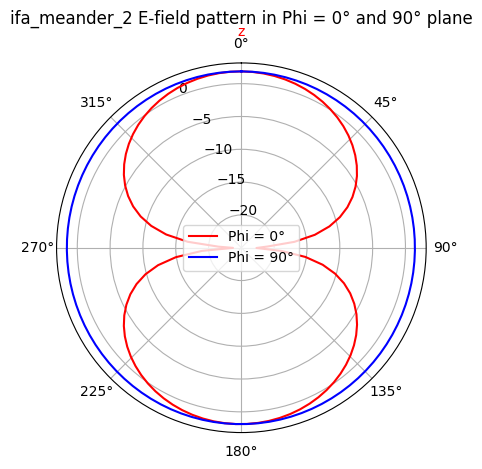

In [ ]:
# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern

# Maillage dense pour une sphère utilisée dans les calculs de rayonnement
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

ifa_meander_mesh2_mat = 'data/antennas_mesh2/ifa_meander_2_mesh2.mat'
ifa_meander_current_mat = 'data/antennas_current/ifa_meander_2_current.mat'
ifa_meander_gain_power_mat = 'data/antennas_gain_power/ifa_meander_2_gain_power.mat'

print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(ifa_meander_mesh2_mat, ifa_meander_current_mat, filename_sphere_dense, radiation=True)

# Étape 3 : Génération du diagramme de directivité
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(ifa_meander_mesh2_mat, ifa_meander_current_mat, ifa_meander_gain_power_mat, radiation=True)

Nombre_meandre = 6
wid = 1 / 1000
L_short = 1.5 / 1000

x, y = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

def run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat):
    # Affiche l'iteration
    print(f"\nIteration {iteration + 1}\n")
    print(f"wid = {wid * 1000}")
    print(f"short feed = {distance_short * 1000}\n")
    # x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)


def update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b):
    distance_short = new_distance_short
    wid = new_wid
    feed = t_b/2 - distance_short
    feed_wid = wid
    feed_point = [0, feed, 0]
    # Si new_Nombre_meandre est None ou non fourni, ne pas le retourner
    if new_Nombre_meandre is not None:
        return distance_short, wid, new_Nombre_meandre, feed, feed_wid, feed_point
    else:
        return distance_short, wid, feed, feed_wid, feed_point


has_converged = False
max_iterations = 15

x, y, Nombre_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)

# Nombre_meandre = 6

# Loop for simulation
iteration = 0
while not has_converged and iteration < max_iterations:

    run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat)

    s11_db, f_resonance, new_distance_short, new_wid, new_Nombre_meandre, has_converged, impedances = simulate_freq_loop_test_version_3(
        fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, Lenght_antenna, b, a, L_short, Nombre_meandre)
    
    # Remplacement par appel de la fonction update_ifa_meander_params
    distance_short, wid, Nombre_meandre, feed, feed_wid, feed_point = update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b)

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    x, y = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    iteration += 1


